## PRICE REGRESSION MODELLING

Librerías

In [2]:
pip install Werkzeug==2.0.3

     -------------------------------------- 289.2/289.2 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.2.2
    Uninstalling Werkzeug-2.2.2:
      Successfully uninstalled Werkzeug-2.2.2
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
from sklearn.decomposition import PCA
from urllib.parse import urlencode
import pandas as pd
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import math
from plotly.subplots import make_subplots

import importlib.machinery
import importlib.util
import logging
import os
import sys
from pathlib import Path

pio.renderers.default = 'vscode'
pio.templates.default = 'plotly'

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize


import plotly.figure_factory as ff

import geopandas 
import json

from cv2 import mean
from itertools import count

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from scipy.stats import uniform, randint

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

import re
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import ipywidgets as widgets
from plotly.offline import init_notebook_mode
from ipywidgets import interact, interactive, fixed, interact_manual
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
pd.set_option('display.max_columns', None)

c:\Users\belen\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Importación de datos filtrados

In [30]:
listings_filtered_df = pd.read_parquet("../Data/total data/modified data/listingsFinalConRentabilidad.parquet")
pd.options.display.max_columns = None
listings_filtered_df.head()

,id,last_scraped,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,years_permanency,baths,price per unit,occupancy_rate,revenue,profitability,amenities_lower,has_wifi,has_dryer,has_tv,has_heating,has_kitchen
0,2539,2022-09-07,2787,John,2008-09-07,within an hour,100,90,f,Gravesend,9.0,12.0,t,t,Kensington,Brooklyn,40.64529,-73.97238,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""First aid kit"", ""Microwave"", ""Stove"", ""Coffe...",299.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,21,51,81,356,9,0,0,2015-12-04,2018-10-19,4.89,4.88,5.00,5.00,5.00,4.75,4.88,None,f,9,1,6,2,0.11,14.219178,1.0,4.418201e+05,0.111236,12139.735955,0.027477,"[""first aid kit"", ""microwave"", ""stove"", ""coffe...",1,1,1,1,1
1,2595,2022-09-07,2845,Jennifer,2008-09-09,within a day,75,23,f,Midtown,6.0,9.0,t,t,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Stove"", ""Coffee maker"", ""Long term stays all...",175.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,5,280,49,1,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.80,4.81,4.40,None,f,3,3,0,0,0.31,14.213699,1.0,5.095289e+06,0.398571,25458.750000,0.004997,"[""stove"", ""coffee maker"", ""long term stays all...",1,1,1,1,1
2,5121,2022-09-07,7356,Garon,2009-02-03,within an hour,100,100,t,Bedford-Stuyvesant,2.0,2.0,t,t,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,None,1.0,1.0,"[""Heating"", ""Kitchen"", ""Air conditioning"", ""Wi...",60.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,5,30,60,335,50,0,0,2009-05-28,2019-12-02,4.52,4.22,4.09,4.91,4.91,4.47,4.52,None,f,2,0,2,0,0.31,13.810959,0.0,2.552823e+05,0.333134,7295.641791,0.028579,"[""heating"", ""kitchen"", ""air conditioning"", ""wi...",1,0,0,1,1
3,45910,2022-09-07,204539,Mark,2010-08-17,within an hour,100,19,f,Ridgewood,7.0,7.0,t,t,Ridgewood,Queens,40.70309,-73.89963,Entire townhouse,Entire home/apt,16,NaN,2.5 baths,5.0,10.0,"[""Hair dryer"", ""Essentials"", ""Carbon monoxide ...",425.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,13,0,0,2012-01-03,2019-11-12,4.42,4.64,4.36,4.82,5.00,4.82,4.55,None,f,6,6,0,0,0.10,12.276712,2.5,3.830991e+05,0.098630,15300.000000,0.039937,"[""hair dryer"", ""essentials"", ""carbon monoxide ...",1,1,1,1,1
4,5136,2022-09-07,7378,Rebecca,2009-02-03,None,None,33,f,Greenwood Heights,1.0,5.0,t,t,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,NaN,1.5 baths,2.0,2.0,"[""Hair dryer"", ""Cable TV"", ""Refrigerator"", ""BB...",275.0,21,1125,21.0,21.0,1125.0,1125.0,21.0,1125.0,NaN,t,0,0,0,179,3,1,1,2014-01-02,2022-08-10,5.00,5.00,5.00,5.00,5.00,4.67,5.00,None,f,1,1,0,0,0.03,13.810959,1.5,3.286703e+05,0.042235,4239.301676,0.012898,"[""hair dryer"", ""cable tv"", ""refrigerator"", ""bb...",1,1,1,1,1


In [31]:
listings_filtered_df.columns

Index(['id', 'last_scraped', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       '

#### MODELO SIMPLE

Seleccionamos las variables que de primeras pensamos que son más influyentes en el precio de los Airbnb en la ciudad de Nueva York y entrenamos un modelo con estas variables

*Las variables que hemos escogido son: latitude, longitude, neighobourhood_group_cleansed, accomodates, beds, baths, amenities*

*Vamos a crear variables dummies en las amenities más repetidas (sacadas del wordcloud el EDA) que son wifi, dryer, TV, heating, kitchen*

Selección de variables finales para el modelo

In [34]:
data_model = listings_filtered_df[["price","latitude","longitude","neighbourhood_group_cleansed","accommodates","beds","baths","has_wifi","has_dryer","has_heating","has_kitchen","has_tv"]]
data_model.head()

,price,latitude,longitude,neighbourhood_group_cleansed,accommodates,beds,baths,has_wifi,has_dryer,has_heating,has_kitchen,has_tv
0,299.0,40.64529,-73.97238,Brooklyn,2,1.0,1.0,1,1,1,1,1
1,175.0,40.75356,-73.98559,Manhattan,1,1.0,1.0,1,1,1,1,1
2,60.0,40.68535,-73.95512,Brooklyn,2,1.0,0.0,1,0,1,1,0
3,425.0,40.70309,-73.89963,Queens,16,10.0,2.5,1,1,1,1,1
4,275.0,40.66265,-73.99454,Brooklyn,4,2.0,1.5,1,1,1,1,1


In [33]:
# creacion de dummmies
data_model_num = pd.get_dummies(data_model, columns = ["neighbourhood_group_cleansed"])
data_model_num.head()

,price,latitude,longitude,accommodates,beds,baths,has_wifi,has_dryer,has_heating,has_kitchen,has_tv,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island
0,299.0,40.64529,-73.97238,2,1.0,1.0,1,1,1,1,1,0,1,0,0,0
1,175.0,40.75356,-73.98559,1,1.0,1.0,1,1,1,1,1,0,0,1,0,0
2,60.0,40.68535,-73.95512,2,1.0,0.0,1,0,1,1,0,0,1,0,0,0
3,425.0,40.70309,-73.89963,16,10.0,2.5,1,1,1,1,1,0,0,0,1,0
4,275.0,40.66265,-73.99454,4,2.0,1.5,1,1,1,1,1,0,1,0,0,0


In [15]:
data_model_num.isna().sum()

price                                           0
latitude                                        0
longitude                                       0
accommodates                                    0
beds                                          322
baths                                           0
has_wifi                                        0
has_dryer                                       0
has_heating                                     0
has_kitchen                                     0
has_tv                                          0
neighbourhood_group_cleansed_Bronx              0
neighbourhood_group_cleansed_Brooklyn           0
neighbourhood_group_cleansed_Manhattan          0
neighbourhood_group_cleansed_Queens             0
neighbourhood_group_cleansed_Staten Island      0
dtype: int64

In [16]:
# quito los na 
data_model_num = data_model_num.dropna()

In [28]:
data_model_num.columns

Index(['price', 'latitude', 'longitude', 'accommodates', 'beds', 'baths',
       'has_wifi', 'has_dryer', 'has_heating', 'has_kitchen', 'has_tv',
       'neighbourhood_group_cleansed_Bronx',
       'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Manhattan',
       'neighbourhood_group_cleansed_Queens',
       'neighbourhood_group_cleansed_Staten Island'],
      dtype='object')

Entrenamiento del modelo

Split

In [17]:
df_train, df_test  = train_test_split(data_model_num,
                                test_size=0.3,
                                random_state = 101)

In [18]:
df_test, df_validation  = train_test_split(df_test,
                                test_size=0.5,
                                random_state = 101)

In [19]:
#division entre train y test 
X_train = df_train.drop("price", axis = 1)
y_train = df_train["price"]

X_test = df_test.drop("price", axis = 1)
y_test = df_test["price"]

X_val = df_validation.drop("price", axis = 1)
y_val = df_validation["price"]

Funciones

In [20]:
def show_metrics(prediction_test, prediction_train, y_test, y_train):
    MAE = round(metrics.mean_absolute_error(y_test, prediction_test), 2)
    MSE = round(metrics.mean_squared_error(y_test, prediction_test), 2)
    RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)), 2)
    RMSE_ratio_test= round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)) / np.mean(y_test),3)
    RMSE_ratio_train = round(np.sqrt(metrics.mean_squared_error(y_train, prediction_train)) / np.mean(y_train),3)
    R_2_test = round(metrics.explained_variance_score(y_test, prediction_test), 2)
    R_2_train = round(metrics.explained_variance_score(y_train, prediction_train), 2)
    
    metrics_data = pd.DataFrame(data = [MAE, MSE, RMSE, RMSE_ratio_test, 
                                    RMSE_ratio_train, R_2_test, R_2_train]).T
    
    metrics_data.columns = ['MAE', 'MSE', 'RMSE', 'RMSE_ratio_test', 
                                    'RMSE_ratio_train', 'R_2_test', 'R_2_train']
    display(metrics_data)

In [21]:
def analysis(model, X_train, X_test, y_train, y_test):
    
    prediction_test = model.predict(X_test)
    prediction_train = model.predict(X_train)
        
    
    show_metrics(prediction_test, prediction_train, y_test, y_train)
    
    sns.regplot(x = y_test, y = prediction_test, fit_reg=True)
    plt.title('Prediction and real')
    plt.show()

    sns.distplot(y_test - prediction_test, bins = 50)
    plt.title('Error variance')
    plt.show()

In [29]:
rfm.predict(X_test)

array([ 93.27852767, 251.15514305, 230.0856924 , ..., 115.14283486,
       140.83036123, 383.86363743])

Linear Regressor

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,74.84,11879.1,108.99,0.587,0.64,0.41,0.4


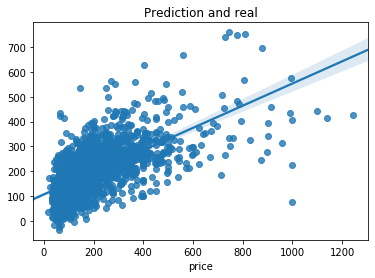

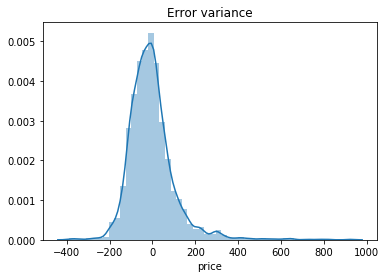

In [22]:
lm = LinearRegression(
        n_jobs = -1,
        normalize = True
)

lm.fit(X_train, y_train)

comment = ''

analysis(
    model = lm, 
    X_train = X_train, 
    X_test = X_test, 
    y_train = y_train, 
    y_test = y_test
)

Random Forest

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,58.34,8448.18,91.91,0.495,0.419,0.58,0.74


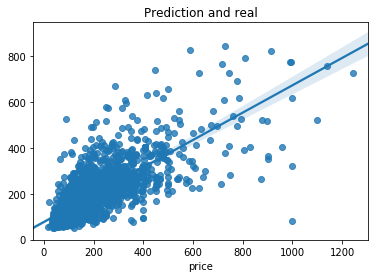

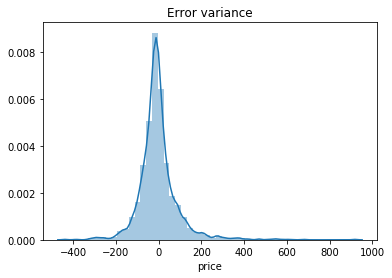

In [23]:
rfm = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          random_state = 101,
          n_estimators = 700
    
)
rfm.fit(X_train, y_train)

comment = ''

analysis(
    model = rfm, 
    X_train =X_train, 
    X_test = X_test, 
    y_train = y_train, 
    y_test = y_test
)

In [24]:
importancia_predictores = pd.DataFrame(
                            {'predictor': data_model_num.drop(columns = "price").columns,
                             'importancia': rfm.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
importancia_predictores = importancia_predictores.sort_values('importancia', ascending=False).head(10).reset_index()
importancia_predictores

Importancia de los predictores en el modelo


,index,predictor,importancia
0,2,accommodates,0.280264
1,1,longitude,0.266622
2,0,latitude,0.198532
3,4,baths,0.149577
4,12,neighbourhood_group_cleansed_Manhattan,0.036735
5,3,beds,0.022918
6,8,has_kitchen,0.020624
7,9,has_tv,0.012012
8,6,has_dryer,0.004255
9,7,has_heating,0.003864


In [25]:
# visualizacion de la importancia mediante un grafico de barras
data = [
    go.Bar(
        y = importancia_predictores["predictor"],
        x = importancia_predictores["importancia"],
        marker_color = "steelblue",
        orientation='h',
        name = "Importancia de variables"
    )      
]

layout = go.Layout(title = "Importancia de variables en el Random Forest", xaxis_title = "Importancia", yaxis_title = "Variables")

fig = go.Figure(data = data, layout = layout)

fig.show()

Guardar modelo en .pickle

In [26]:
import pickle

pickle.dump(rfm, open("random_forest_model.pickle", 'wb'))

Gradient Boosting Regressor

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,61.16,8878.4,94.23,0.508,0.538,0.56,0.58


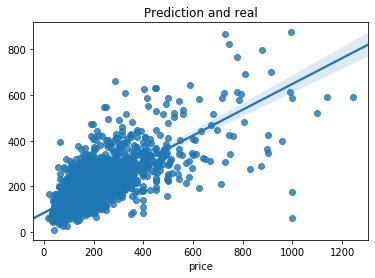

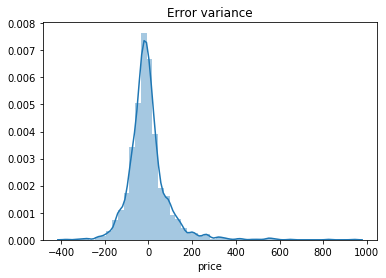

In [105]:
gbr_model = GradientBoostingRegressor(random_state = 101)
gbr_model.fit(X_train, y_train)

comment = ''

analysis(
    model = gbr_model, 
    X_train = X_train, 
    X_test = X_test,
    y_train = y_train, 
    y_test = y_test
)

In [107]:
importancia_predictores = pd.DataFrame(
                            {'predictor': data_model_num.drop(columns = "price").columns,
                             'importancia': gbr_model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
importancia_predictores = importancia_predictores.sort_values('importancia', ascending=False).head(10).reset_index()
importancia_predictores 

Importancia de los predictores en el modelo


,index,predictor,importancia
0,2,accommodates,0.354700
1,1,longitude,0.253209
2,4,baths,0.156411
3,0,latitude,0.127316
4,12,neighbourhood_group_cleansed_Manhattan,0.071117
5,8,has_kitchen,0.015475
6,9,has_tv,0.010780
7,3,beds,0.007646
8,6,has_dryer,0.002172
9,7,has_heating,0.000660


In [115]:
# visualizacion de la importancia mediante un grafico de barras
data = [
    go.Bar(
        y = importancia_predictores["predictor"],
        x = importancia_predictores["importancia"],
        marker_color = "steelblue",
        orientation='h',
        name = "Importancia de variables"
    )      
]

layout = go.Layout(title = "Importancia de variables en el Gradient Boosting Regressor", xaxis_title = "Importancia", yaxis_title = "Variables")

fig = go.Figure(data = data, layout = layout)

fig.show()

XG Boost

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,61.16,8878.4,94.23,0.508,0.538,0.56,0.58


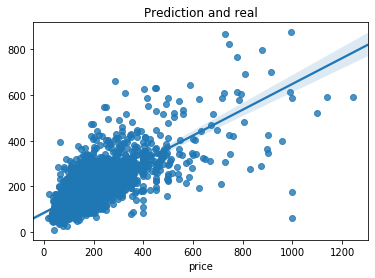

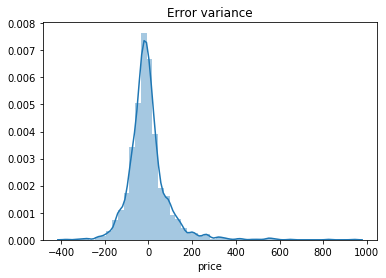

In [110]:
xg_model = xgb.XGBRegressor(random_state = 101)
xg_model.fit(X_train, y_train)

comment = ''

analysis(
    model = gbr_model, 
    X_train = X_train, 
    X_test = X_test,
    y_train = y_train, 
    y_test = y_test
)

In [112]:
importancia_predictores = pd.DataFrame(
                            {'predictor': data_model_num.drop(columns = "price").columns,
                             'importancia': xg_model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
importancia_predictores = importancia_predictores.sort_values('importancia', ascending=False).head(10).reset_index()
importancia_predictores

Importancia de los predictores en el modelo


,index,predictor,importancia
0,12,neighbourhood_group_cleansed_Manhattan,0.456437
1,4,baths,0.149452
2,2,accommodates,0.116020
3,8,has_kitchen,0.061558
4,9,has_tv,0.048077
5,1,longitude,0.038994
6,0,latitude,0.027520
7,11,neighbourhood_group_cleansed_Brooklyn,0.021880
8,5,has_wifi,0.016700
9,3,beds,0.016414


In [114]:
# visualizacion de la importancia mediante un grafico de barras
data = [
    go.Bar(
        y = importancia_predictores["predictor"],
        x = importancia_predictores["importancia"],
        marker_color = "steelblue",
        orientation='h',
        name = "Importancia de variables"
    )      
]

layout = go.Layout(title = "Importancia de variables en el XG Boost", xaxis_title = "Importancia", yaxis_title = "Variables")

fig = go.Figure(data = data, layout = layout)

fig.show()

Modelo con solo las variables más significativas del Random Forest

In [121]:
variables = ["accommodates","latitude","longitude","baths","beds"]

In [122]:
# filtro variables más significativas en los distintos datasets
X_train_f = X_train[variables]
y_train_f = y_train

X_test_f = X_test[variables]
y_test_f = y_test

X_val = X_val[variables]
y_val_f = y_val

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,59.65,8739.27,93.48,0.504,0.434,0.57,0.73


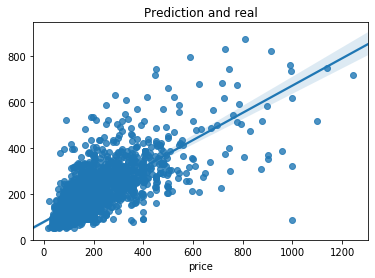

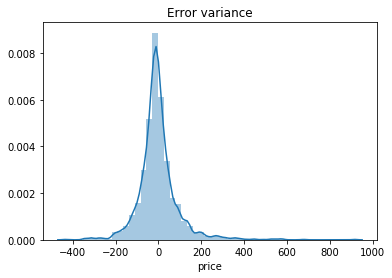

In [124]:
rfm_f = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          random_state = 101,
          n_estimators = 700
    
)
rfm_f.fit(X_train_f, y_train_f)

comment = ''

analysis(
    model = rfm_f, 
    X_train =X_train_f, 
    X_test = X_test_f, 
    y_train = y_train_f, 
    y_test = y_test_f
)

In [125]:
importancia_predictores_f = pd.DataFrame(
                            {'predictor': variables,
                             'importancia': rfm_f.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
importancia_predictores_f = importancia_predictores_f.sort_values('importancia', ascending=False).head(10).reset_index()
importancia_predictores_f

Importancia de los predictores en el modelo


,index,predictor,importancia
0,2,longitude,0.313765
1,0,accommodates,0.289339
2,1,latitude,0.222117
3,3,baths,0.152028
4,4,beds,0.022751


In [126]:
# visualizacion de la importancia mediante un grafico de barras
data = [
    go.Bar(
        y = importancia_predictores_f["predictor"],
        x = importancia_predictores_f["importancia"],
        marker_color = "steelblue",
        orientation='h',
        name = "Importancia de variables"
    )      
]

layout = go.Layout(title = "Importancia de variables en el Random Forest con las variables más significativas", xaxis_title = "Importancia", yaxis_title = "Variables")

fig = go.Figure(data = data, layout = layout)

fig.show()